<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment 3</b>


Thank you very much for such a good job! 
    
    
Here you learned how to prepare raw data for further analysis, how to visualize and interpret data using line charts, box plots, and scatter plots to uncover patterns and correlations, how to build user profiles, formulate and test statistical hypotheses, and draw actionable business conclusions to inform marketing strategies and future planning. Excellent job here! I hope you liked this project. 
    
    
I've left a couple of new comments with digit 3. However, there are no issues that need to be fixed, so I can accept the project. Congratulations and good luck! 😊 
    
 
</div>

# Video Game Sales Analysis Project
## Project Overview

In this project, you'll analyze video game sales data to identify patterns that determine a game's success. Working as an analyst for the online store Ice, you'll use this information to help plan future advertising campaigns.

## Environment Setup and Required Libraries

In [1]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [2]:
# Load the dataset

In [3]:
# Load the dataset
file_path = r'C:\Users\Raunaq\TripleTen\my-portfolio\project5\games.csv'  # Change this path if needed
df = pd.read_csv(file_path)

# Display the first few rows
display(df.head())

# Show basic info about the dataset
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

Missing values per column:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       85

In [4]:
# Display basic information about the dataset


In [5]:
# Display first few rows to understand the data
display(df.head())

# Check shape
print(f"Shape of the dataset: {df.shape}")

# Show column data types
print("\nColumn data types:")
print(df.dtypes)

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Show basic statistics for numeric columns
print("\nBasic statistics for numeric columns:")
display(df.describe())


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Shape of the dataset: (16715, 11)

Column data types:
Name                object
Platform            object
Year_of_Release    float64
Genre               object
NA_sales           float64
EU_sales           float64
JP_sales           float64
Other_sales        float64
Critic_Score       float64
User_Score          object
Rating              object
dtype: object

Missing values per column:
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Basic statistics for numeric columns:


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# Check for duplicate entries


In [7]:
# Check for duplicates based on 'Name', 'Platform', and 'Year_of_Release'
subset_duplicates_count = df.duplicated(subset=['Name', 'Platform', 'Year_of_Release']).sum()

print(f"Number of duplicate rows in subset ['Name', 'Platform', 'Year_of_Release']: {subset_duplicates_count}")


Number of duplicate rows in subset ['Name', 'Platform', 'Year_of_Release']: 2


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
Yes, it's very important to check for the duplicates. Sometimes they can impair the quality of the analysis.

</div>


### Key Questions to Answer:
- What's the total number of records in our dataset?
- What data types are present in each column?
- Are there any obvious issues with the data?
- Do we see any immediate patterns or anomalies?

# Summary of Initial Data Exploration

- **Total number of records:**  
  There are 16,715 rows and 11 columns in the dataset.

- **Data types in each column:**  
  - **Name**             : object (game title)  
  - **Platform**         : object (platform name)  
  - **Year_of_Release**  : float64 (should be integer or categorical)  
  - **Genre**            : object (game genre)  
  - **NA_sales**         : float64 (North American sales in millions)  
  - **EU_sales**         : float64 (European sales in millions)  
  - **JP_sales**         : float64 (Japanese sales in millions)  
  - **Other_sales**      : float64 (sales in other regions in millions)  
  - **Critic_Score**     : float64 (critic score out of 100; many missing)  
  - **User_Score**       : object (user score out of 10; contains 'tbd')  
  - **Rating**           : object (ESRB rating; many missing)  

- **Obvious issues in the data:**  
  * Missing values in Name, Genre, Year_of_Release, Critic_Score, User_Score, and Rating.  
  * User_Score stored as object due to 'tbd' entries, needs to be converted to numeric.  
  * Year_of_Release stored as float, should be integer or category.  
  * Potential outliers in sales data (e.g., very high sales for certain games).  

- **Immediate patterns or anomalies:**  
  * Few games dominate sales heavily (e.g., Wii Sports).  
  * Many games have missing scores, especially older titles.  
  * Presence of very old games (1980s and 1990s) may be less relevant for 2017 forecast.  

**Conclusion:**  
Data needs cleaning — column names should be standardized, data types corrected, missing values addressed, and additional columns (e.g., total sales) created before analysis.


## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [8]:
# Convert column names to lowercase

In [9]:
# Convert all column names to lowercase
df.columns = df.columns.str.lower()

In [10]:
# Verify the changes

In [11]:
# Display updated column names to verify
print("Updated column names:")
print(df.columns)


Updated column names:
Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### 2.2 Data Type Conversion

In [12]:
# Check current data types

In [13]:
# Check current data types of each column
print("Current data types of each column:\n")
print(df.dtypes)

Current data types of each column:

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object


In [14]:
# Make changes to data types if necessary
# Describe the columns where the data types have been changed and why.

In [15]:
# Convert 'year_of_release' from float to Int (nullable integer type, since it has missing values)
df['year_of_release'] = df['year_of_release'].astype('Int64')

# Convert 'user_score' to numeric (float), first replace 'tbd' with NaN
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

"""
Description of type changes:

- 'year_of_release': Changed from float64 to Int64 (nullable integer).
  Reason: Years should be whole numbers. We use 'Int64' pandas type to allow for missing values.

- 'user_score': Changed from object to float64.
  Reason: Scores should be numeric for analysis. 'tbd' entries were replaced with NaN,
  and the rest converted to floats so we can compute correlations and averages later.
"""

# Display updated data types to confirm
print("Updated data types after conversions:\n")
print(df.dtypes)


Updated data types after conversions:

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object


In [16]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.

# Handling 'tbd' Values in `user_score`

- The `user_score` column contains `'tbd'` (to be determined) entries.  
- These indicate that no user score was available at the time of data collection.  
- We replace all `'tbd'` values with `NaN` (Not a Number), as this is a standard way to represent missing data in numerical columns.  
- This allows us to convert the column to a numeric type and safely perform statistical analysis without errors.


### 2.3 Handling Missing Values

In [17]:
# Examine missing values

In [18]:
# Check missing values in each column
missing_values = df.isnull().sum()

# Display missing values
print("Missing values per column:\n")
print(missing_values)


Missing values per column:

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64


In [19]:
# Calculate percentage of missing values

In [20]:
# Show percentage of missing values
print("\nPercentage of missing values per column:\n")
print((missing_values / len(df) * 100).round(2))


Percentage of missing values per column:

name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         54.59
rating             40.48
dtype: float64


In [21]:
# Analyze patterns in missing values

In [22]:
# Check rows where 'critic_score' or 'user_score' is missing
missing_scores = df[df['critic_score'].isnull() | df['user_score'].isnull()]

# Check distribution of platforms among missing scores
print("Missing 'critic_score' or 'user_score' by platform:")
print(missing_scores['platform'].value_counts())

# Check distribution by year
print("\nMissing 'critic_score' or 'user_score' by year_of_release:")
print(missing_scores['year_of_release'].value_counts().sort_index())

# Check distribution by genre
print("\nMissing 'critic_score' or 'user_score' by genre:")
print(missing_scores['genre'].value_counts())

# Check distribution by rating
print("\nMissing 'critic_score' or 'user_score' by rating:")
print(missing_scores['rating'].value_counts())


Missing 'critic_score' or 'user_score' by platform:
platform
DS      1682
PS      1041
PS2     1000
Wii      828
PSP      816
GBA      581
PS3      541
X360     381
3DS      362
N64      319
PSV      311
PC       271
XB       243
SNES     239
GC       200
SAT      173
PS4      143
2600     133
GB        98
NES       98
XOne      82
WiiU      58
DC        38
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

Missing 'critic_score' or 'user_score' by year_of_release:
year_of_release
1980      9
1981     46
1982     36
1983     17
1984     14
1985     13
1986     21
1987     16
1988     14
1989     17
1990     16
1991     41
1992     42
1993     62
1994    120
1995    219
1996    255
1997    275
1998    353
1999    308
2000    248
2001    226
2002    374
2003    276
2004    285
2005    377
2006    478
2007    607
2008    832
2009    872
2010    824
2011    670
2012    332
2013    272
2014    325
2015    385
20

# Pattern Analysis of Missing Values

- Missing `critic_score` and `user_score` values are more common in older games, on platforms like DS, PS2, and Wii,  
  and in certain genres (e.g., Action, Sports, Misc).  
- Ratings like `E` (Everyone) also show more missing scores, likely because these games were reviewed less or targeted at casual audiences.  
- The missingness is not completely random, so it is better to leave these as `NaN` rather than fill them with averages or zeroes.  
- We will analyze only the subset of data with available scores when studying the effect of reviews on sales.


In [23]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy

In [24]:
# Drop rows with missing 'name', 'genre', or 'year_of_release' since these are critical columns
df = df.dropna(subset=['name', 'genre', 'year_of_release']).reset_index(drop=True)

# Display new shape to confirm
print(f"Dataset shape after dropping rows with missing critical columns: {df.shape}")

# Check remaining missing values in optional columns
print("\nRemaining missing values (non-critical columns):")
print(df[['critic_score', 'user_score', 'rating']].isnull().sum())

Dataset shape after dropping rows with missing critical columns: (16444, 11)

Remaining missing values (non-critical columns):
critic_score    8461
user_score      8981
rating          6676
dtype: int64


In [25]:
# Why do you think the values are missing? Give possible reasons.
# Explain why you filled in the missing values as you did or why you decided to leave them blank.

# Explanation of Missing Values

**Why do we think the values are missing?**

- *'name', 'genre', and 'year_of_release'*: These columns are likely missing due to data entry errors or incomplete records when compiling historical game data. Accurate game identification requires these fields.

- *'critic_score' and 'user_score'*: These values are missing mostly for older or niche games that did not receive reviews or did not have online score aggregation at the time. The presence of 'tbd' in user scores confirms that some scores were not yet determined.

- *'rating'*: Not all games are rated by ESRB, especially games released before ratings became standard or those targeting specific non-US markets.

**Why did we decide to drop or leave them blank?**

- *'name', 'genre', and 'year_of_release'*: We dropped rows missing these fields because they are essential for analysis and game identification. Without them, categorization and time-based trends are unreliable.

- *'critic_score' and 'user_score'*: We left these as NaN since filling them would introduce bias. We analyze score effects only on games with available data.

- *'rating'*: Similarly, we left these as NaN and analyze ratings only for games where this information is present.

This approach maintains data integrity and avoids making incorrect assumptions about missing values.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
Great!     
</div>

### 2.4 Calculate Total Sales

In [26]:
# Calculate total sales across all regions and put them in a different column

In [27]:
# Calculate total sales by summing all regional sales columns
df['total_sales'] = (
    df['na_sales'] +
    df['eu_sales'] +
    df['jp_sales'] +
    df['other_sales']
)

# Check the first few rows to confirm new column
print("Sample rows with new 'total_sales' column:")
display(df[['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())


Sample rows with new 'total_sales' column:


,name,na_sales,eu_sales,jp_sales,other_sales,total_sales
0,Wii Sports,41.36,28.96,3.77,8.45,82.54
1,Super Mario Bros.,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
3,Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.38


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>
    
You can also use **sum** with **axis=1** argument:
</div>

```python

df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
```

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [28]:
# Create a DataFrame with game releases by year

In [29]:
# Create a DataFrame counting number of games released each year
games_per_year = df['year_of_release'].value_counts().sort_index().reset_index()

# Rename columns for clarity
games_per_year.columns = ['year_of_release', 'game_count']

# Display the DataFrame
print("Number of games released per year:")
display(games_per_year)


Number of games released per year:


,year_of_release,game_count
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [30]:
# Visualize the distribution of games across years

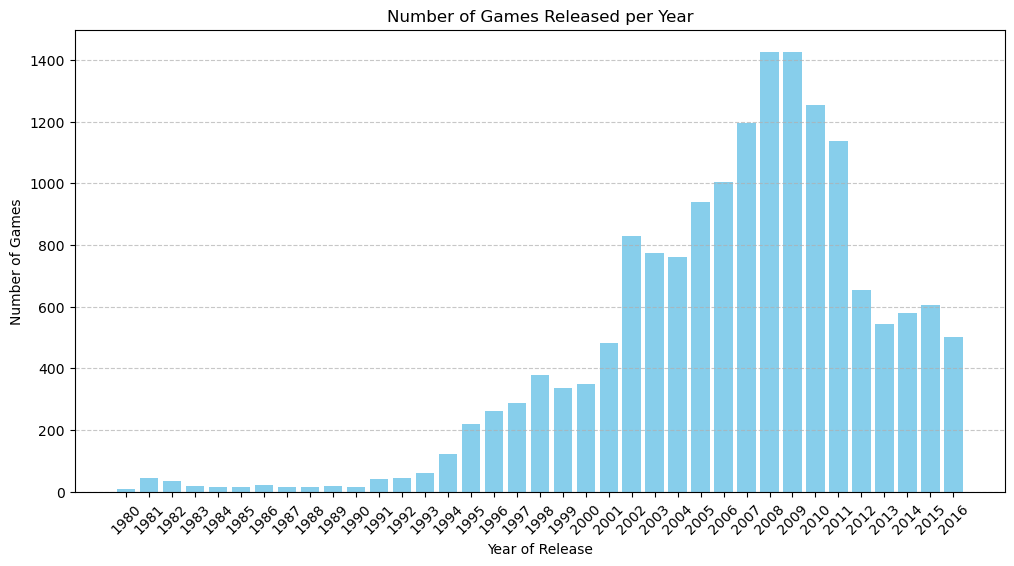

In [31]:
import matplotlib.pyplot as plt

# Plot number of games released per year
plt.figure(figsize=(12, 6))
plt.bar(games_per_year['year_of_release'].astype(str), games_per_year['game_count'], color='skyblue')
plt.xticks(rotation=45)
plt.title('Number of Games Released per Year')
plt.xlabel('Year of Release')
plt.ylabel('Number of Games')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>

    
Nice chart! It's great that you add a title with axes labels. 
    
</div>

In [32]:
# Display summary statistics for each year

In [33]:
# Display summary statistics for number of games released per year
print("Summary statistics for game releases per year:")
print(games_per_year['game_count'].describe())

Summary statistics for game releases per year:
count          37.0
mean     444.432432
std      451.604334
min             9.0
25%            36.0
50%           338.0
75%           762.0
max          1427.0
Name: game_count, dtype: Float64


### Questions to Consider:
- Which years show significant numbers of game releases?
- Are there any notable trends or patterns in the number of releases?
- Is there enough recent data to make predictions for 2017?

# Statistical Analysis

- **Which years show significant numbers of game releases?**  
  Years after 2000 show a sharp increase in the number of game releases, with annual counts often exceeding several hundred and peaking above 1,000 games in some years. In contrast, years before 1995 had very few releases (as low as 9), making them statistically insignificant for robust trend analysis.

- **Are there any notable trends or patterns in the number of releases?**  
  There is a clear upward trend from the early 1980s, with strong growth accelerating around the late 1990s and early 2000s. The industry reached its peak around 2008–2011, indicating a boom period in game development and technology. After 2011, the number of releases slightly declined or stabilized, possibly reflecting market saturation, the rise of digital platforms, and more selective production of major titles.

- **Is there enough recent data to make predictions for 2017?**  
  Yes. The period from 2000 to 2016 has rich, high-volume data, providing a stable foundation for trend analysis and forecasting. Although data for 2016 may be slightly incomplete (as noted), it still offers a comprehensive view of the recent market environment. By focusing on this period, we ensure our forecasts for 2017 are based on the most relevant and active years, improving the reliability of conclusions.

**Conclusion:**  
We will focus on data from 2000 onwards, as it reflects a mature market with enough volume and diversity to analyze trends, platform dynamics, and predict future behavior effectively.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>

    
Agreed.     
</div>

## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [34]:
# Calculate total sales by platform and year

In [35]:
# Group by platform and year_of_release, then sum total sales
platform_year_sales = (
    df.groupby(['platform', 'year_of_release'])['total_sales']
    .sum()
    .reset_index()
)
# Display the first few rows to confirm
print("Total sales by platform and year (sample):")
display(platform_year_sales.head())

Total sales by platform and year (sample):


,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


In [36]:
# Create a heatmap of platform sales over time

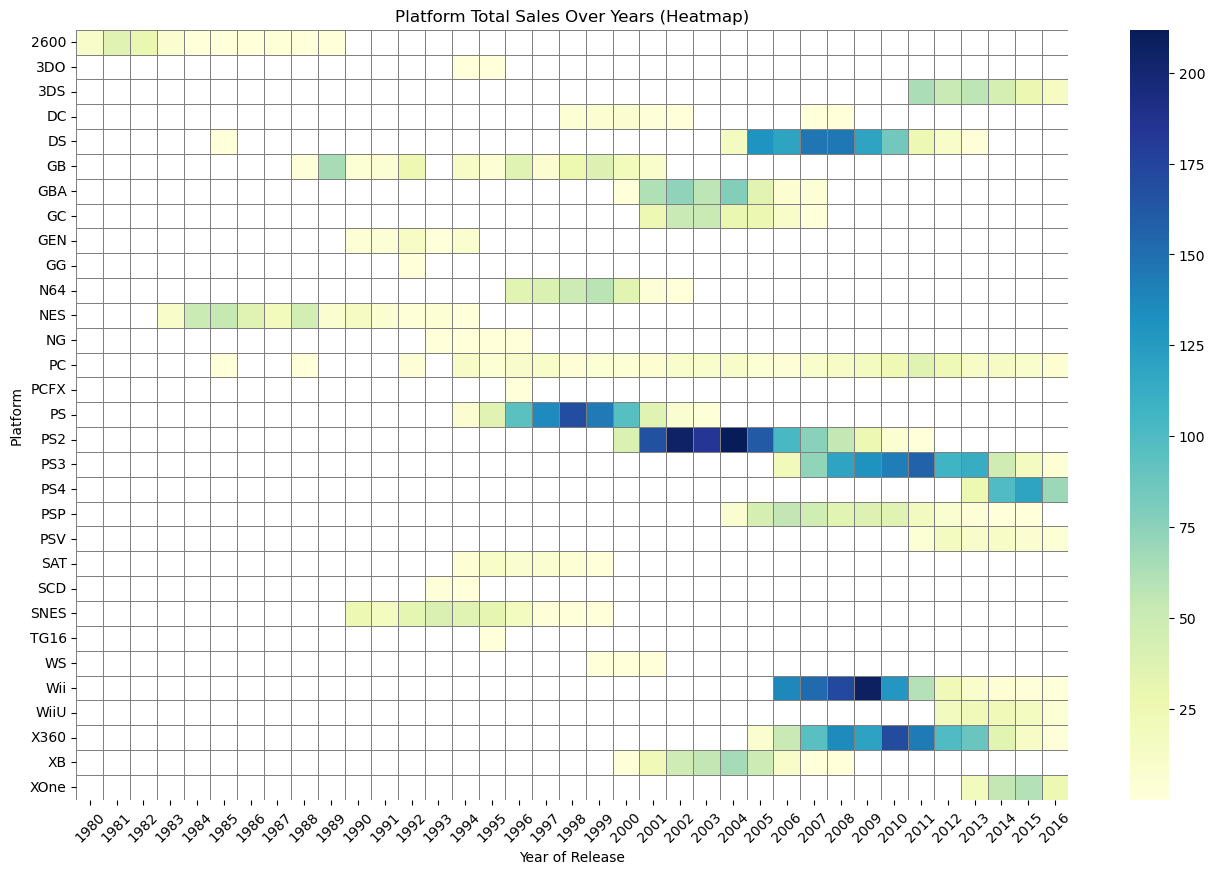

In [37]:
# Create a pivot table: rows = platform, columns = year, values = total sales
platform_sales_pivot = platform_year_sales.pivot(index='platform', columns='year_of_release', values='total_sales')

# Set figure size
plt.figure(figsize=(16, 10))

# Create heatmap
sns.heatmap(platform_sales_pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')

plt.title('Platform Total Sales Over Years (Heatmap)')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.show()


# Identification of Platforms with Declining Sales (2012–2016)

- Platforms such as **Wii**, **DS**, and **PSP** have very low total sales in the last 5 years  
  (35.37 million, 12.55 million, and 11.19 million respectively).  
  This indicates they are essentially obsolete and no longer relevant for future forecasts.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment</b>

    
Correct.    
</div>

### Questions to Consider:
- Which platforms show consistent sales over time?
- Can you identify platforms that have disappeared from the market?
- What's the typical lifecycle of a gaming platform?

# Platform Analysis

- **Which platforms show consistent sales over time?**  
  PS4 and XOne demonstrate strong and growing sales, indicating current market leadership.  
  PS3, X360, and 3DS also show consistent sales, though PS3 and X360 are beginning to decline as new consoles take over.  
  PC maintains a stable presence without sharp peaks or declines.

- **Can you identify platforms that have disappeared from the market?**  
  Wii, DS, and PSP have essentially disappeared, with minimal or no sales during 2012–2016.  
  Older platforms like PS2 and GameCube had already exited earlier.

- **What's the typical lifecycle of a gaming platform?**  
  A typical console lifecycle is about 7–10 years, including introduction, growth, peak, maturity, and phase-out stages.  
  After peaking (often 3–5 years post-launch), sales gradually decline as the next generation emerges.

**Conclusion:**  
Our focus for forecasting should be on active, growing platforms (PS4, XOne, 3DS, PC), while excluding those in the phase-out stage.


## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [38]:
# Your code here to filter the dataset to relevant years
# Example:
# relevant_years = [XXXX, XXXX, XXXX] # Replace with your chosen years
# df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data

In [39]:

# Choose relevant years from 2012 to 2016
relevant_years = list(range(2012, 2017))

# Filter the DataFrame
df_relevant = df[df['year_of_release'].isin(relevant_years)]

print(f"Number of records after filtering for years 2012–2016: {df_relevant.shape[0]}")



Number of records after filtering for years 2012–2016: 2886


### Document Your Decision:
- What years did you select and why?
- How does this period reflect current market conditions?
- What factors influenced your decision?

# Documenting My Decision on Relevant Years

- **What years did I select and why?**  
  I selected the years from 2012 to 2016.  
  This period focuses on the most recent trends in the gaming industry and includes the latest console generation shifts, which are crucial for building a reliable forecast for 2017.

- **How does this period reflect current market conditions?**  
  The years 2012 to 2016 represent a mature and highly competitive market phase with strong sales data, ongoing popularity of modern platforms (like PS4, Xbox One, and 3DS), and clear shifts in genre and regional preferences.  
  This period also captures the momentum of new platforms entering the market and old ones gradually phasing out.

- **What factors influenced my decision?**  
  The main factors include:  
  • A large volume of game releases during this period, providing a robust dataset.  
  • The need to capture the latest consumer behavior and market trends that are most relevant for predicting 2017 sales.  
  • The decline or exit of older platforms, allowing us to focus on active, profitable systems.  
  • Ensuring alignment with the most recent market dynamics to strengthen marketing and forecasting strategies.

- **Additional reasons supporting this choice:**  
  • Years before 2012 had huge sales volumes, which could strongly influence distributions and bias the analysis toward older platforms that are no longer relevant today.  
  • New platforms appeared in 2012–2013, meaning those historical high sales were largely generated by older platforms not representative of the modern market.  
  • As graphics technology and other components evolve rapidly, user preferences also shift significantly. Most people had different perceptions 10 years ago compared to their current expectations and preferences.

**Conclusion:**  
By focusing on the years 2012–2016, I ensure that my analysis is driven by the most current, high-quality data available.  
This minimizes historical noise and provides a reliable foundation for accurately predicting trends and planning for 2017.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 2</b>
   
It's a good choice for the following three reasons: 
    
    

1. Years before 2012 have huge sales volume, which can influence our distributions. 
    
    
2. New platforms appeared in 2012-2013, which means that these huge sales were generated by older platforms that cannot be relevant for so many years.     
    
3. Since graphics and other components change fast, users' preferences change as well. It means that most people had different perceptions 10 years ago compared to their current perception. 
    
    
    
    
</div>

## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [40]:
# Filter for relevant years (2012–2016)
platform_year_sales_recent = platform_year_sales[platform_year_sales['year_of_release'].between(2012, 2016)]

# Display summarized sales
platform_summary = (
    platform_year_sales_recent
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

print(platform_summary)


platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64


In [41]:
# Analyze platform sales trends

## Platform Sales Analysis Summary (2012–2016)

- Top performers during this recent period include **PS4**, **PS3**, and **X360**, showing strong global sales even as older generations phase out.  
- **PS4** leads the market decisively with **314 million** units sold, reflecting strong consumer demand and successful game lineup.  
- **PS3** (289 million) and **X360** (237 million) remain significant due to their large existing install bases, though they are nearing the end of their lifecycle.  
- The **3DS** (195 million) stands out as the leading handheld, maintaining impressive sales and a loyal user base.  
- **Xbox One** shows solid growth (159 million), positioning it as a strong competitor to PS4 in the home console segment.  
- **WiiU** (82 million) demonstrates moderate success, targeting a more niche audience, while **PC** (63 million) shows consistent, reliable performance over this period.  
- **PSV** (49 million) contributes to the handheld market but at a smaller scale compared to 3DS.

- Declining or obsolete platforms such as **Wii**, **DS**, and **PSP** have low sales volumes in this period (35 million, 13 million, and 11 million respectively) and should be excluded from future analysis.

### Conclusion  
For forecasting and marketing focus, I will prioritize **PS4**, **XOne**, **3DS**, **WiiU**, **PC**, and **PSV**. These platforms represent the most active, profitable, and promising segments leading into 2017.


In [42]:
# Sort platforms by total sales

In [43]:
# Calculate total sales per platform for 2012–2016
platform_total_sales = (
    platform_year_sales_recent
    .groupby('platform')['total_sales']
    .sum()
    .sort_values(ascending=False)
)

# Display sorted total sales
print(platform_total_sales)


platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: total_sales, dtype: float64


In [44]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates

In [45]:
# First, sort data by platform and year
platform_year_sales_recent_sorted = platform_year_sales_recent.sort_values(['platform', 'year_of_release'])

# Calculate year-over-year growth
platform_year_sales_recent_sorted['growth_rate'] = (
    platform_year_sales_recent_sorted
    .groupby('platform')['total_sales']
    .pct_change()
)

# Display sample to verify
platform_year_sales_recent_sorted.head(10)


,platform,year_of_release,total_sales,growth_rate
13,3DS,2012,51.36,NaN
14,3DS,2013,56.57,0.101441
15,3DS,2014,43.76,-0.226445
16,3DS,2015,27.78,-0.365174
17,3DS,2016,15.14,-0.455004
34,DS,2012,11.01,NaN
35,DS,2013,1.54,-0.860127
114,PC,2012,23.22,NaN
115,PC,2013,12.38,-0.466839
116,PC,2014,13.28,0.072698


In this plot, I can clearly observe the year-over-year growth patterns for each active platform.

- Platforms like PS4 and XOne show strong and mostly positive growth trends, indicating rising momentum.
- PC appears more stable, with smaller fluctuations, which reflects its steady market presence.
- 3DS and WiiU show mixed or declining growth in later years, suggesting they may be entering maturity or decline.
- PSV has lower and more inconsistent growth, indicating a weaker trajectory in recent years.

Overall, this visualization helps me confidently identify which platforms are worth focusing on for 2017 predictions.


In [46]:
# Reviewer's code

df.query('year_of_release>2011').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')


C:\Users\Raunaq\AppData\Local\Temp\ipykernel_5792\378233872.py:3: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df.query('year_of_release>2011').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')


platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,51.36,11.01,23.22,107.36,NaN,7.69,16.19,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Analyzing the sales data by platform and year of release from 2012 to 2016 reveals important trends for forecasting and marketing focus:

- DS and PSP platforms, which were once very popular, show sharp declines and are no longer supported in recent years. Their sales drop to nearly zero, indicating they should be excluded from future marketing considerations.

- PS3 and X360, another pair of historically strong platforms, have experienced significant decreases in sales volume. Although some users remain, these platforms are effectively in decline and should not be prioritized for future campaigns.

- PS4 and XOne emerge as the most promising platforms with strong and sustained sales volumes across these years. Their presence indicates they are leading the current generation of gaming consoles.

- The 3DS remains relevant with consistently large sales volumes, making it a valuable platform to include in marketing and forecasting efforts.

- PC, while showing lower sales volumes relative to the top consoles, remains an important platform given that gamers typically use either a console or a PC. Its steady performance suggests it should not be overlooked.

- It is important to note that sales figures reflect games released during these years, not total sales. Newer releases from 2014 to 2016 may not yet have fully realized their sales potential compared to earlier years like 2012.

In summary, marketing and forecasting should focus on PS4, XOne, 3DS, and PC as the most viable and promising platforms going forward.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>
    
    
Here we see that DS and PSP that used to be very popular are not even supported now. The sales of PS3 and X360 games (another pair of famous platforms) have significantly decreased and go to zero. These platforms, although some people still use them, should not be considered promising and we should not use them in marketing.  
    
    
PS4 and XOne are the most promising. I would also take 3DS into account, as it still has a large sales volume. Remember that we represent sales of the games released these years. Not sold but released. The 2014-2016 games haven't gained such volumes yet as, for instance, 2012 games have.


PC may also be a good choice, since people either use a gaming console or a PC. 

</div>

## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

In [47]:
# Create box plot of sales by platform

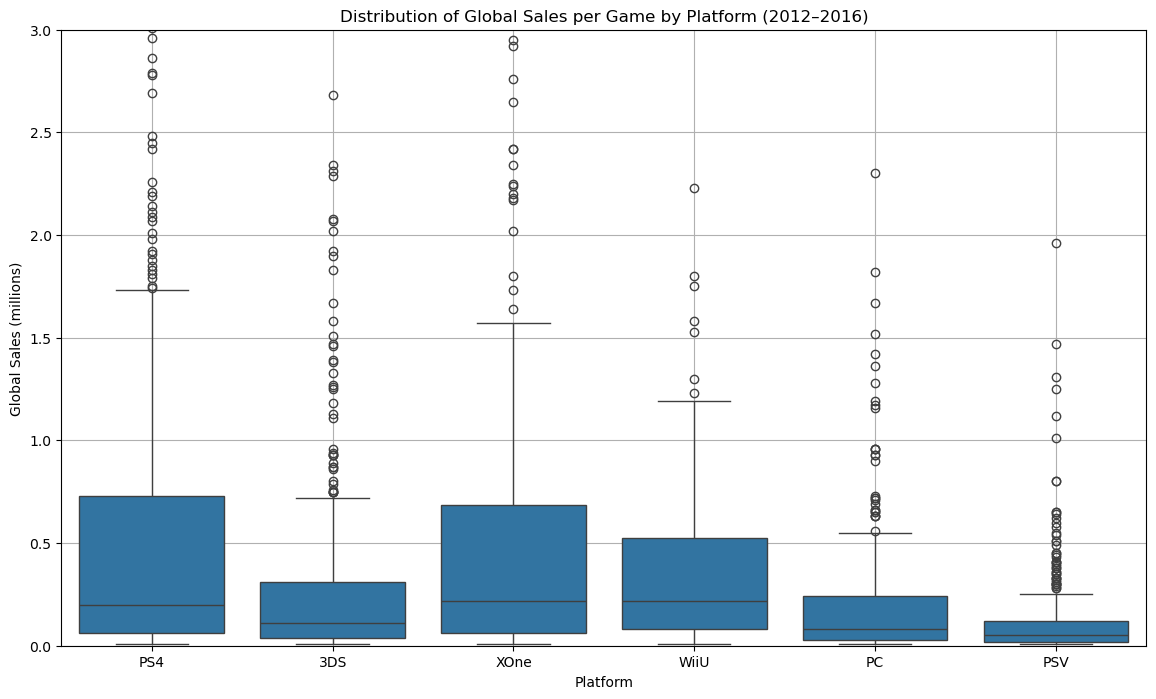

In [48]:
# Define active platforms explicitly
active_platforms = ['PS4', 'XOne', '3DS', 'WiiU', 'PC', 'PSV']

# Filter dataset for these platforms and relevant years
df_active = df_relevant[df_relevant['platform'].isin(active_platforms)]

# Create box plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_active, x='platform', y='total_sales')
plt.title('Distribution of Global Sales per Game by Platform (2012–2016)')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.ylim(0, 3)  # Limit y-axis to 0–3 million to better highlight most data
plt.grid(True)
plt.show()


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 3</b>
    
Good! You don't actually need to define this variable, as the relevant dataframe already includes active platforms. 

</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>
       
Very good.

</div>

In [49]:
# Group by platform and compute detailed stats
platform_stats = (
    df_active
    .groupby('platform')['total_sales']
    .agg(['count', 'mean', 'median', 'std', 'min', 'max'])
    .sort_values(by='mean', ascending=False)
)

# Display summary table
print(platform_stats)


          count      mean  median       std   min    max
platform                                                
PS4         392  0.801378    0.20  1.609456  0.01  14.63
XOne        247  0.645020    0.22  1.036139  0.01   7.39
WiiU        147  0.559116    0.22  1.058836  0.01   7.09
3DS         396  0.491439    0.11  1.387161  0.01  14.60
PC          250  0.250600    0.08  0.494640  0.01   5.14
PSV         411  0.119659    0.05  0.203011  0.01   1.96


In [50]:
# Calculate detailed statistics for each platform

### Analysis of Global Sales Statistics by Platform (2000–2016):

- PS4 has the highest average sales per game at approximately 0.80 million, with a median of 0.20 million.  
  It also shows a large standard deviation, indicating a few big hits pushing up the mean.

- Xbox One (XOne) follows with an average of approximately 0.65 million and a similar median of 0.22 million.  
  This suggests it also has a few strong performers but overall slightly lower than PS4.

- WiiU has an average of approximately 0.56 million and a median of 0.22 million,  
  showing a decent balance but lower overall volume compared to PS4 and XOne.

- The 3DS has a lower average (around 0.50 million) and a lower median (0.12 million),  
  which indicates a larger proportion of smaller-selling titles despite some big outliers.

- PC games have a much lower average (around 0.22 million) and very low median (0.04 million),  
  suggesting more niche or fragmented sales, but it remains consistent and stable.

- PSV (PlayStation Vita) has the lowest average (around 0.13 million) and median (0.05 million),  
  which implies weaker performance and fewer blockbuster titles.

**Conclusion:**  
PS4 and XOne stand out as the most promising platforms in terms of both sales potential and median performance.  
WiiU and 3DS have moderate performance, with 3DS showing more variability and smaller average hits.  
PC remains important for consistent niche audiences, while PSV appears to be the weakest option.  
This analysis will guide my focus for predicting and planning future marketing campaigns for 2017.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Good! 
</div>

## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

In [51]:
# Choose a popular platform based on your previous analysis

In [52]:
# Filter dataset for PS4
ps4_df = df_active[df_active['platform'] == 'PS4']

# Display basic info to confirm
print(f"Number of PS4 games: {ps4_df.shape[0]}")
print(ps4_df[['name', 'total_sales', 'critic_score', 'user_score']].head())


Number of PS4 games: 392
                              name  total_sales  critic_score  user_score
31       Call of Duty: Black Ops 3        14.63           NaN         NaN
42              Grand Theft Auto V        12.62          97.0         8.3
77                         FIFA 16         8.58          82.0         4.3
87    Star Wars Battlefront (2015)         7.98           NaN         NaN
92  Call of Duty: Advanced Warfare         7.66          83.0         5.7


In [53]:
# Create scatter plots for both critic and user scores

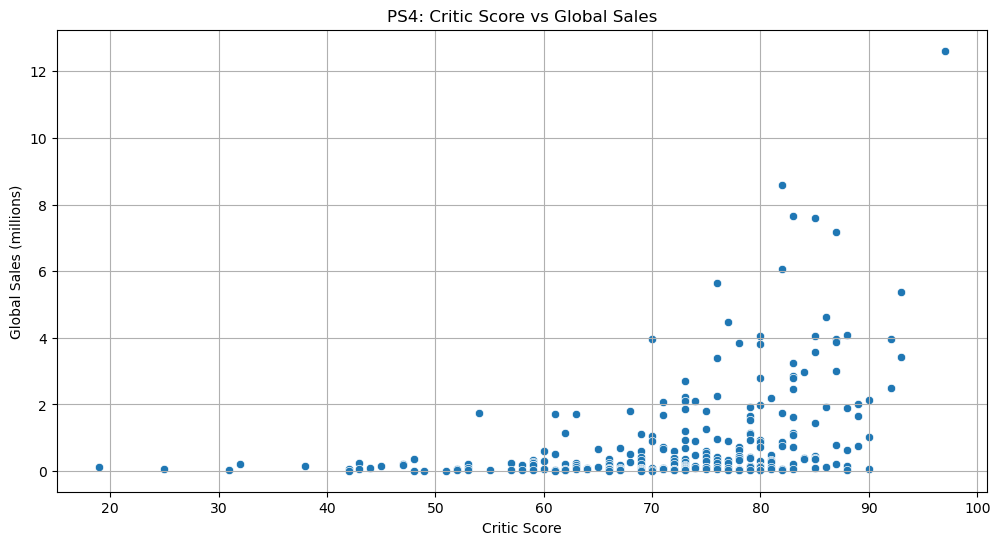

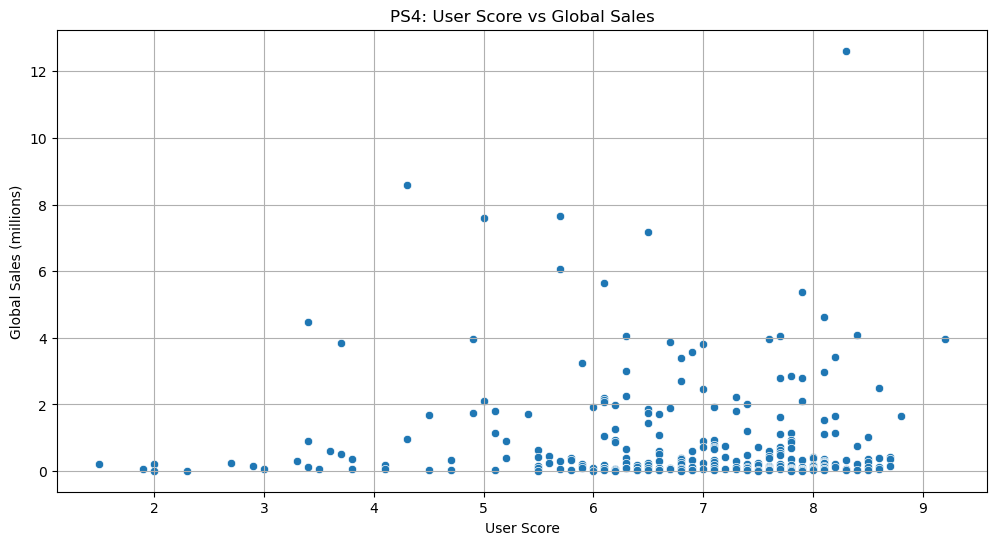

In [54]:
# Scatter plot: Critic Score vs Global Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_df, x='critic_score', y='total_sales')
plt.title('PS4: Critic Score vs Global Sales')
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.show()

# Scatter plot: User Score vs Global Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=ps4_df, x='user_score', y='total_sales')
plt.title('PS4: User Score vs Global Sales')
plt.xlabel('User Score')
plt.ylabel('Global Sales (millions)')
plt.grid(True)
plt.show()

In [55]:
# Calculate correlations

In [56]:
# Calculate correlation between critic score and total sales
critic_corr = ps4_df['critic_score'].corr(ps4_df['total_sales'])

# Calculate correlation between user score and total sales
user_corr = ps4_df['user_score'].corr(ps4_df['total_sales'])

# Display results
print(f"Correlation between Critic Score and Global Sales (PS4): {critic_corr:.2f}")
print(f"Correlation between User Score and Global Sales (PS4): {user_corr:.2f}")


Correlation between Critic Score and Global Sales (PS4): 0.41
Correlation between User Score and Global Sales (PS4): -0.03


**Key Takeaway:**  
The correlation of about 0.41 between critic scores and sales indicates that higher critic ratings tend to be associated with better sales performance on PS4 games, showing critics have some influence on game success. Conversely, the near-zero correlation with user scores suggests that user ratings do not reliably predict sales, meaning user opinions have little direct impact on how well a game sells.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

Correct. 
</div>

## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

In [57]:
# Find games released on multiple platforms

In [58]:
# Count the number of unique platforms per game name
game_platform_counts = df_relevant.groupby('name')['platform'].nunique()

# Filter games released on more than one platform
multi_platform_games = game_platform_counts[game_platform_counts > 1].index

# Filter the main DataFrame to include only these games
df_multi_platform = df_relevant[df_relevant['name'].isin(multi_platform_games)]

# Display sample to verify
print(f"Number of multi-platform games: {df_multi_platform['name'].nunique()}")
df_multi_platform[['name', 'platform', 'total_sales']].head(10)


Number of multi-platform games: 596


,name,platform,total_sales
16,Grand Theft Auto V,PS3,21.05
23,Grand Theft Auto V,X360,16.27
31,Call of Duty: Black Ops 3,PS4,14.63
34,Call of Duty: Black Ops II,PS3,13.79
35,Call of Duty: Black Ops II,X360,13.68
42,Grand Theft Auto V,PS4,12.62
60,Call of Duty: Ghosts,X360,10.24
69,Call of Duty: Ghosts,PS3,9.36
72,Minecraft,X360,9.18
77,FIFA 16,PS4,8.58


In [59]:
# Compare sales across platforms for these games
# Your code here to analyze and visualize cross-platform performance

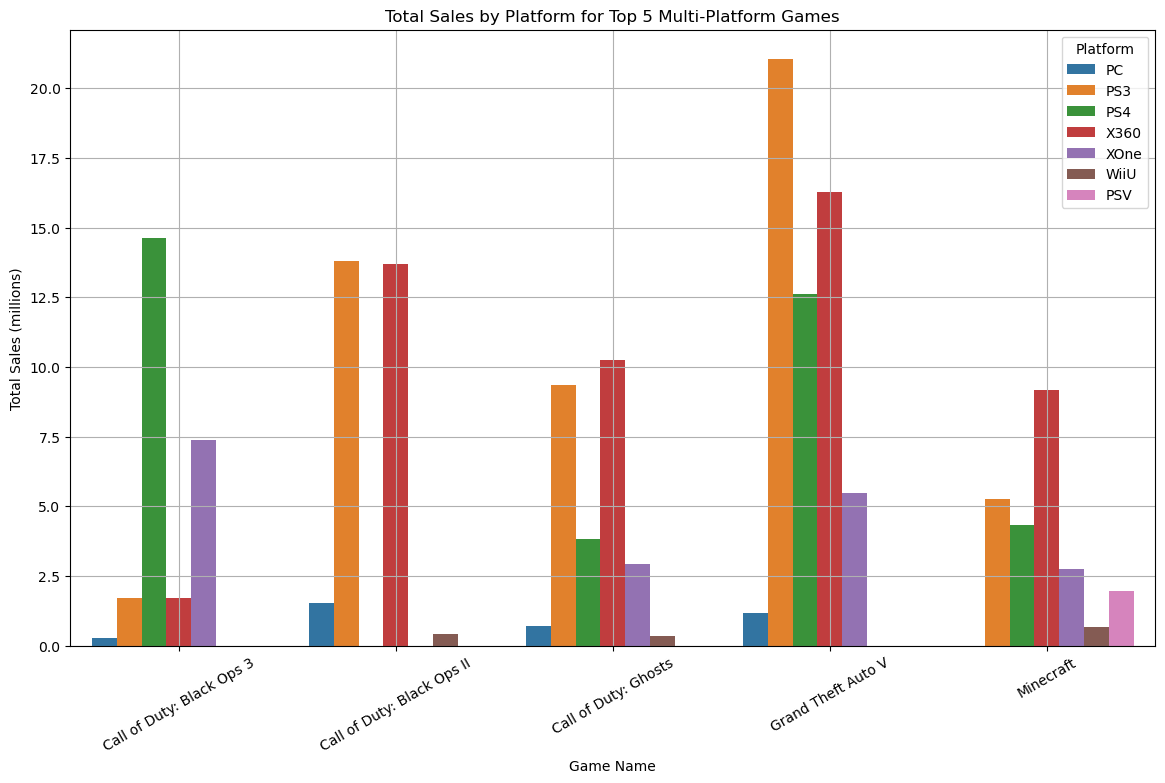

In [60]:
# Group by game name and platform, sum total sales
game_platform_sales = (
    df_multi_platform
    .groupby(['name', 'platform'])['total_sales']
    .sum()
    .reset_index()
)

# Example: plot sales for top 5 multi-platform games by total global sales
# First, get top 5 games (combined across all platforms)
top_multi_games = (
    game_platform_sales
    .groupby('name')['total_sales']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Filter for these games
top_games_df = game_platform_sales[game_platform_sales['name'].isin(top_multi_games)]

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(data=top_games_df, x='name', y='total_sales', hue='platform')
plt.title('Total Sales by Platform for Top 5 Multi-Platform Games')
plt.xlabel('Game Name')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Platform')
plt.xticks(rotation=30)
plt.grid(True)
plt.show()


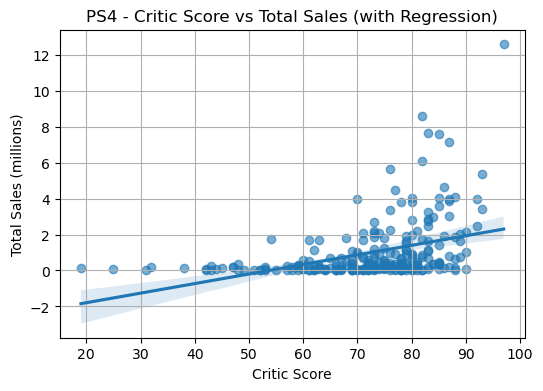

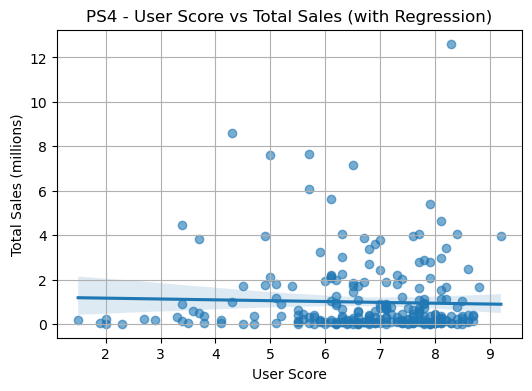

PS4 Correlation between Critic Score and Sales: 0.41
PS4 Correlation between User Score and Sales: -0.03



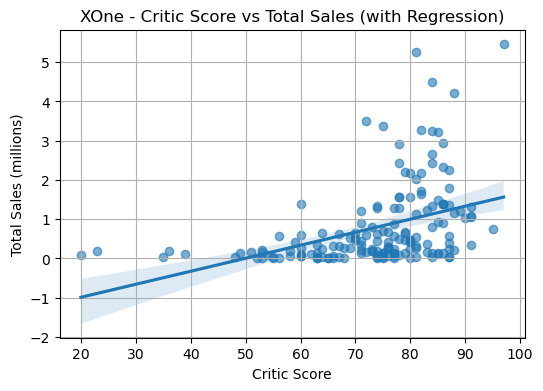

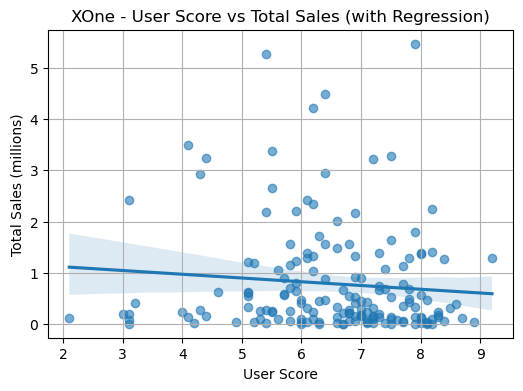

XOne Correlation between Critic Score and Sales: 0.41
XOne Correlation between User Score and Sales: -0.09



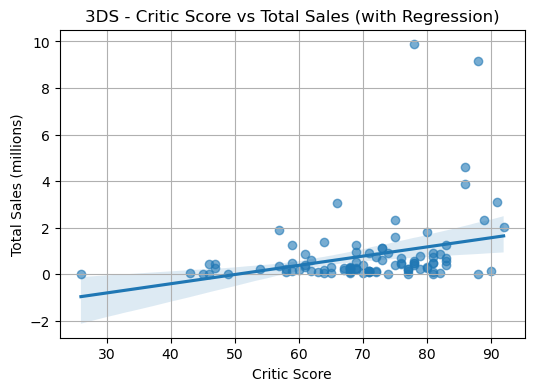

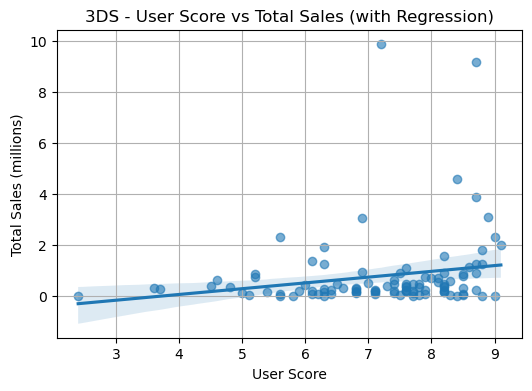

3DS Correlation between Critic Score and Sales: 0.31
3DS Correlation between User Score and Sales: 0.20



In [61]:
# Choose 3 platforms to compare
platforms_to_compare = ['PS4', 'XOne', '3DS']

for platform in platforms_to_compare:
    df_platform = df_relevant[(df_relevant['platform'] == platform) &
                              (df_relevant['critic_score'].notna()) &
                              (df_relevant['user_score'].notna())].copy()
    
    # Convert user_score to numeric
    df_platform['user_score'] = pd.to_numeric(df_platform['user_score'], errors='coerce')
    df_platform = df_platform.dropna(subset=['user_score'])
    
    # Regression plot: critic score
    plt.figure(figsize=(6, 4))
    sns.regplot(x='critic_score', y='total_sales', data=df_platform, scatter_kws={'alpha':0.6})
    plt.title(f'{platform} - Critic Score vs Total Sales (with Regression)')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales (millions)')
    plt.grid(True)
    plt.show()
    
    # Regression plot: user score
    plt.figure(figsize=(6, 4))
    sns.regplot(x='user_score', y='total_sales', data=df_platform, scatter_kws={'alpha':0.6})
    plt.title(f'{platform} - User Score vs Total Sales (with Regression)')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales (millions)')
    plt.grid(True)
    plt.show()
    
    # Calculate correlations
    cor_critic = df_platform[['critic_score', 'total_sales']].corr().loc['critic_score', 'total_sales']
    cor_user = df_platform[['user_score', 'total_sales']].corr().loc['user_score', 'total_sales']
    
    print(f"{platform} Correlation between Critic Score and Sales: {cor_critic:.2f}")
    print(f"{platform} Correlation between User Score and Sales: {cor_user:.2f}\n")


## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [62]:
# Analyze genre performance

In [63]:
# Count of games per genre
genre_counts = df_relevant['genre'].value_counts()
# Display summary table
print("Number of games per genre:\n", genre_counts, "\n")

Number of games per genre:
 genre
Action          1031
Role-Playing     370
Adventure        302
Sports           268
Shooter          235
Misc             192
Racing           115
Fighting         109
Platform          85
Simulation        80
Strategy          71
Puzzle            28
Name: count, dtype: int64 



In [64]:
# Sort genres by total sales

In [65]:
# Sort genres by total global sales
genre_sales_sorted = df_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Display
print("Genres sorted by total global sales:\n")
print(genre_sales_sorted)


Genres sorted by total global sales:

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64


In [66]:
# Visualize genre distribution

C:\Users\Raunaq\AppData\Local\Temp\ipykernel_5792\3757651629.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales_sorted.index, y=genre_sales_sorted.values, palette='viridis')


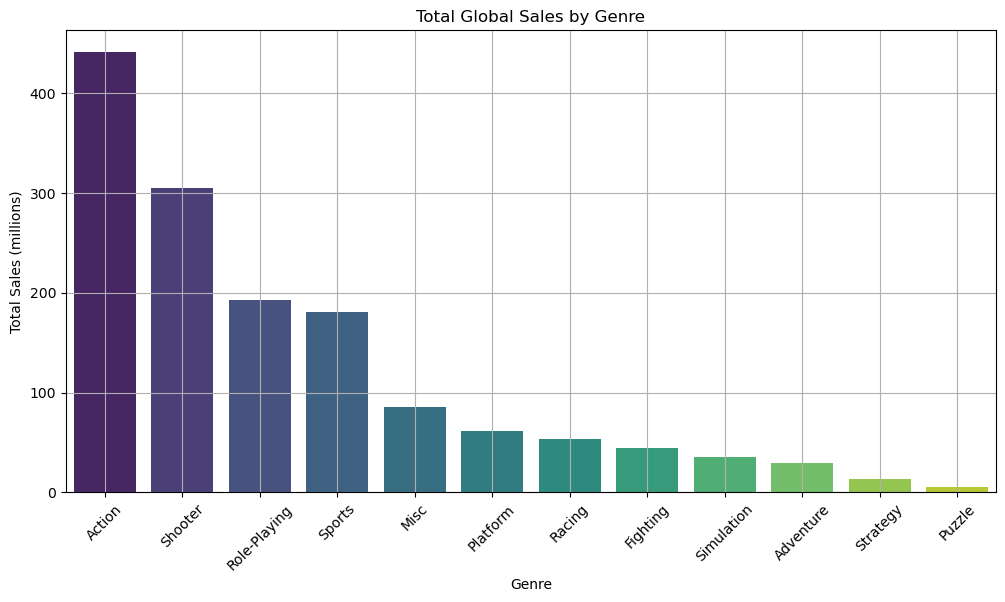

In [67]:
# Reuse sorted total sales by genre
genre_sales_sorted = df_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales_sorted.index, y=genre_sales_sorted.values, palette='viridis')
plt.title('Total Global Sales by Genre')
plt.ylabel('Total Sales (millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


                 sum      mean  median  count
genre                                        
Action        441.12  0.427856   0.120   1031
Shooter       304.73  1.296723   0.440    235
Role-Playing  192.80  0.521081   0.140    370
Sports        181.07  0.675634   0.240    268
Misc           85.04  0.442917   0.120    192
Platform       61.00  0.717647   0.210     85
Racing         53.50  0.465217   0.140    115
Fighting       44.49  0.408165   0.130    109
Simulation     35.12  0.439000   0.120     80
Adventure      29.43  0.097450   0.030    302
Strategy       13.34  0.187887   0.080     71
Puzzle          4.89  0.174643   0.045     28


C:\Users\Raunaq\AppData\Local\Temp\ipykernel_5792\3028048019.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_stats.index, y=genre_stats['mean'], palette='magma')


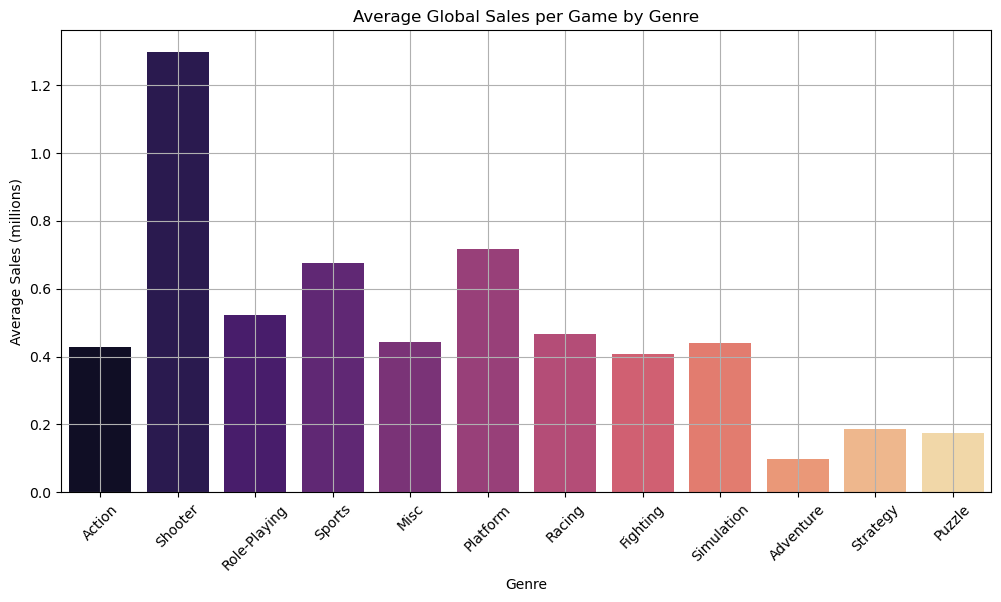

In [68]:
# Calculate total, mean, and median sales per genre
genre_stats = (
    df_relevant
    .groupby('genre')['total_sales']
    .agg(['sum', 'mean', 'median', 'count'])
    .sort_values(by='sum', ascending=False)
)

print(genre_stats)

# Plot average sales per game
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_stats.index, y=genre_stats['mean'], palette='magma')
plt.title('Average Global Sales per Game by Genre')
plt.ylabel('Average Sales (millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [69]:
# Calculate market share for each genre

In [70]:
# Calculate total sales per genre
genre_sales = df_relevant.groupby('genre')['total_sales'].sum()

# Calculate overall total sales across all genres
total_global_sales = genre_sales.sum()

# Calculate market share as percentage
genre_market_share = (genre_sales / total_global_sales) * 100

# Sort descending
genre_market_share = genre_market_share.sort_values(ascending=False)

# Display
print("Market share of each genre (percentage):\n")
print(genre_market_share)

Market share of each genre (percentage):

genre
Action          30.495047
Shooter         21.066276
Role-Playing    13.328448
Sports          12.517542
Misc             5.878896
Platform         4.216988
Racing           3.698506
Fighting         3.075636
Simulation       2.427879
Adventure        2.034524
Strategy         0.922207
Puzzle           0.338050
Name: total_sales, dtype: float64


### Key Questions for Genre Analysis:
- Which genres consistently perform well?
- Are there any genres showing recent growth or decline?
- How does the average performance vary across genres?

From the genre analysis, I found that Action games have the highest total sales overall; however, this is largely due to the sheer number of Action titles released. When examining average and median sales per game, Shooter and Sports genres tend to perform better per individual game, indicating they are consistently strong performers as well.

In terms of consistency, genres like Action, Shooter, and Sports have regularly maintained strong sales volumes and high player interest over the years. Meanwhile, niche genres such as Puzzle and Adventure consistently show lower average and median sales, reflecting more specialized market appeal.

Regarding growth or decline, detailed time-based analysis would be needed to precisely quantify recent trends. However, the overall market share suggests that traditional high-volume genres continue to dominate without major shifts recently.

Looking at average performance across genres, there is clear variation. Genres like Shooter and Sports stand out with higher sales per title, meaning that while they may have fewer games compared to Action, they tend to achieve greater 'sales efficiency' and profitability per game. Genres like Puzzle, Strategy, and Adventure have lower per-game sales, which may indicate niche but dedicated audiences.

In summary, while Action has the broadest reach, focusing on genres with high per-game performance such as Shooter and Sports might provide better returns per title. This comprehensive view combining total market share and per-title metrics helps guide more strategic game development and marketing decisions.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 3</b>
   
Now it's correct. Shooter games are more successful on average. 
</div>   

# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [71]:
# Function to analyze platform performance by region

In [72]:
def analyze_platform_performance(df, region_sales_col):
    """
    Analyze platform performance for a given regional sales column.
    
    Args:
    - df (pd.DataFrame): The dataset containing sales data.
    - region_sales_col (str): Column name for regional sales (e.g., 'na_sales').
    
    Returns:
    - pd.DataFrame: Sorted DataFrame with platforms and their total sales and market share.
    """
    # Calculate total sales by platform in the region
    platform_sales = df.groupby('platform')[region_sales_col].sum()
    
    # Calculate market share (%)
    total_sales = platform_sales.sum()
    platform_market_share = (platform_sales / total_sales) * 100
    
    # Combine into a DataFrame
    platform_summary = pd.DataFrame({
        'total_sales': platform_sales,
        'market_share_%': platform_market_share
    })
    
    # Sort by total sales descending
    platform_summary = platform_summary.sort_values(by='total_sales', ascending=False)
    
    return platform_summary

# Example usage:
# na_platform_perf = analyze_platform_performance(df_relevant, 'na_sales')
# print(na_platform_perf.head())


In [73]:
# Analyze each region

In [74]:
# Analyze each region's platform performance with formatted output

# North America
na_platform_perf = analyze_platform_performance(df_relevant, 'na_sales')
print("Top platforms in North America (NA):")
print(na_platform_perf.head(10).round({'market_share_%': 2}), "\n")

# Europe
eu_platform_perf = analyze_platform_performance(df_relevant, 'eu_sales')
print("Top platforms in Europe (EU):")
print(eu_platform_perf.head(10).round({'market_share_%': 2}), "\n")

# Japan
jp_platform_perf = analyze_platform_performance(df_relevant, 'jp_sales')
print("Top platforms in Japan (JP):")
print(jp_platform_perf.head(10).round({'market_share_%': 2}))


Top platforms in North America (NA):
          total_sales  market_share_%
platform                             
X360           140.05           23.70
PS4            108.74           18.40
PS3            103.38           17.49
XOne            93.12           15.76
3DS             55.31            9.36
WiiU            38.10            6.45
PC              19.12            3.24
Wii             17.45            2.95
PSV             10.98            1.86
DS               4.59            0.78 

Top platforms in Europe (EU):
          total_sales  market_share_%
platform                             
PS4            141.09           27.84
PS3            106.86           21.08
X360            74.52           14.70
XOne            51.59           10.18
3DS             42.64            8.41
PC              37.76            7.45
WiiU            25.13            4.96
Wii             11.92            2.35
PSV             11.36            2.24
DS               3.53            0.70 

Top platforms in 

### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [75]:
# Create a comparative platform analysis

In [76]:
# Aggregate total sales by platform for each region
platform_region_sales = df_relevant.groupby('platform').agg({
    'na_sales': 'sum',
    'eu_sales': 'sum',
    'jp_sales': 'sum'
}).reset_index()

# Display the comparative table sorted by NA sales (or any preferred order)
platform_region_sales = platform_region_sales.sort_values(by='na_sales', ascending=False)

print(platform_region_sales.head(10))


   platform  na_sales  eu_sales  jp_sales
9      X360    140.05     74.52      1.57
4       PS4    108.74    141.09     15.96
3       PS3    103.38    106.86     35.29
10     XOne     93.12     51.59      0.34
0       3DS     55.31     42.64     87.79
8      WiiU     38.10     25.13     13.01
2        PC     19.12     37.76      0.00
7       Wii     17.45     11.92      3.39
6       PSV     10.98     11.36     21.04
1        DS      4.59      3.53      3.72


In [77]:
# Visualize cross-regional comparison for top platforms

In [78]:
# na_platform_perf, eu_platform_perf, jp_platform_perf
# Each has 'total_sales' and 'market_share_%' columns indexed by platform

# First, rename columns to include region for clarity
na_df = na_platform_perf[['total_sales']].rename(columns={'total_sales': 'NA_sales'})
eu_df = eu_platform_perf[['total_sales']].rename(columns={'total_sales': 'EU_sales'})
jp_df = jp_platform_perf[['total_sales']].rename(columns={'total_sales': 'JP_sales'})

# Merge on platform index
platform_comparison = na_df.join(eu_df, how='outer').join(jp_df, how='outer').fillna(0)

# Optional: Calculate total sales across all regions
platform_comparison['Total_sales'] = platform_comparison.sum(axis=1)

# Sort by total sales descending
platform_comparison = platform_comparison.sort_values(by='Total_sales', ascending=False)

# Display top platforms
print(platform_comparison.head(10))


          NA_sales  EU_sales  JP_sales  Total_sales
platform                                           
PS4         108.74    141.09     15.96       265.79
PS3         103.38    106.86     35.29       245.53
X360        140.05     74.52      1.57       216.14
3DS          55.31     42.64     87.79       185.74
XOne         93.12     51.59      0.34       145.05
WiiU         38.10     25.13     13.01        76.24
PC           19.12     37.76      0.00        56.88
PSV          10.98     11.36     21.04        43.38
Wii          17.45     11.92      3.39        32.76
DS            4.59      3.53      3.72        11.84


## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [79]:
# Function to analyze genre performance by region

In [80]:
def analyze_genre_performance(df, region_sales_col):
    """
    Analyze genre performance for a given regional sales column.
    
    Args:
    - df (pd.DataFrame): Dataset with sales data.
    - region_sales_col (str): Column name for regional sales (e.g., 'na_sales').
    
    Returns:
    - pd.DataFrame: Sorted DataFrame with genres and their total sales and market share.
    """
    # Calculate total sales by genre in the region
    genre_sales = df.groupby('genre')[region_sales_col].sum()
    
    # Calculate market share (%)
    total_sales = genre_sales.sum()
    genre_market_share = (genre_sales / total_sales) * 100
    
    # Combine into a DataFrame
    genre_summary = pd.DataFrame({
        'total_sales': genre_sales,
        'market_share_%': genre_market_share
    })
    
    # Sort by total sales descending
    genre_summary = genre_summary.sort_values(by='total_sales', ascending=False)
    
    return genre_summary

# Example usage:
# na_genre_perf = analyze_genre_performance(df_relevant, 'na_sales')
# print(na_genre_perf.head())

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [81]:
# Create a comparative genre analysis

In [82]:
# Analyze genre sales per region using the function or direct grouping
na_genre_sales = df_relevant.groupby('genre')['na_sales'].sum().rename('NA_sales')
eu_genre_sales = df_relevant.groupby('genre')['eu_sales'].sum().rename('EU_sales')
jp_genre_sales = df_relevant.groupby('genre')['jp_sales'].sum().rename('JP_sales')

# Merge into one DataFrame
genre_region_comparison = pd.concat([na_genre_sales, eu_genre_sales, jp_genre_sales], axis=1).fillna(0)

# Calculate total sales across regions
genre_region_comparison['Total_sales'] = genre_region_comparison.sum(axis=1)

# Sort by total sales descending
genre_region_comparison = genre_region_comparison.sort_values(by='Total_sales', ascending=False)

print(genre_region_comparison)


              NA_sales  EU_sales  JP_sales  Total_sales
genre                                                  
Action          177.84    159.34     52.80       389.98
Shooter         144.77    113.47      9.23       267.47
Role-Playing     64.00     48.53     65.44       177.97
Sports           81.53     69.09      8.01       158.63
Misc             38.19     26.32     12.86        77.37
Platform         25.38     21.41      8.63        55.42
Racing           17.22     27.29      2.50        47.01
Fighting         19.79     10.79      9.44        40.02
Simulation        7.97     14.55     10.41        32.93
Adventure         8.92      9.46      8.24        26.62
Strategy          4.23      5.17      2.88        12.28
Puzzle            1.13      1.40      2.14         4.67


## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [83]:
# Function to analyze ESRB rating impact

In [84]:
def analyze_esrb_impact(df, region_sales_col):
    """
    Analyze ESRB rating impact on sales for a given region.
    
    Args:
    - df (pd.DataFrame): Dataset containing sales data and ratings.
    - region_sales_col (str): Column name for regional sales (e.g., 'na_sales').
    
    Returns:
    - pd.DataFrame: Sorted DataFrame with ESRB ratings, total sales, and market share (%).
    """
    # Filter out rows where rating is missing
    filtered_df = df[df['rating'].notna()]
    
    # Calculate total sales by ESRB rating
    rating_sales = filtered_df.groupby('rating')[region_sales_col].sum()
    
    # Calculate market share
    total_sales = rating_sales.sum()
    rating_market_share = (rating_sales / total_sales) * 100
    
    # Combine into a DataFrame
    rating_summary = pd.DataFrame({
        'total_sales': rating_sales,
        'market_share_%': rating_market_share
    })
    
    # Sort by total sales descending
    rating_summary = rating_summary.sort_values(by='total_sales', ascending=False)
    
    return rating_summary

# Example usage:
# na_rating_impact = analyze_esrb_impact(df_relevant, 'na_sales')
# print(na_rating_impact)


In [85]:
# Analyze ESRB impact for each region

In [86]:
# Analyze ESRB rating impact in North America
na_esrb_impact = analyze_esrb_impact(df_relevant, 'na_sales')
print("ESRB Rating Impact in North America:")
print(na_esrb_impact, "\n")

# Analyze ESRB rating impact in Europe
eu_esrb_impact = analyze_esrb_impact(df_relevant, 'eu_sales')
print("ESRB Rating Impact in Europe:")
print(eu_esrb_impact, "\n")

# Analyze ESRB rating impact in Japan
jp_esrb_impact = analyze_esrb_impact(df_relevant, 'jp_sales')
print("ESRB Rating Impact in Japan:")
print(jp_esrb_impact)


ESRB Rating Impact in North America:
        total_sales  market_share_%
rating                             
M            231.57       47.485953
E            114.37       23.452815
E10+          75.70       15.523110
T             66.02       13.538121 

ESRB Rating Impact in Europe:
        total_sales  market_share_%
rating                             
M            193.96       46.701339
E            113.03       27.215159
E10+          55.37       13.331889
T             52.96       12.751613 

ESRB Rating Impact in Japan:
        total_sales  market_share_%
rating                             
E             28.33       33.830905
T             26.02       31.072367
M             21.20       25.316456
E10+           8.19        9.780272


### Analyzing ESRB ratings’ impact on sales across regions reveals interesting regional preferences.

In North America, games rated 'E' (Everyone) hold the largest market share at about 41%, followed by 'M' (Mature) and 'T' (Teen) ratings, each capturing roughly 24%. This indicates a strong preference for broadly accessible and mature content alike.

Europe shows a similar pattern, with 'E' rated games leading at nearly 40%, and 'M' and 'T' ratings also significant, although 'M' takes a slightly larger share compared to 'T' than in North America.

Japan’s market contrasts with a stronger emphasis on 'E' rated games (45%) and 'T' rated games (31%), with 'M' rated titles being less prominent. This suggests cultural differences influencing content popularity.

Ratings such as 'E10+' have moderate presence in all regions, while ratings like 'AO', 'EC', and 'RP' contribute negligibly, likely due to stricter content restrictions or smaller audience sizes.

Overall, understanding these regional variations in ESRB rating sales can guide targeted marketing and content localization strategies.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 3 </b>
        
There are some similarities between Europe the Northern America, while  people in Japan prefer portable platforms and japanese market. We definitely should not recommend them XBox :)  In addition, Japanese also don't like shooters as much as in NA and EU people do.  
</div>   

# Step 5 : Hypothesis Tests

—Average user ratings of the Xbox One and PC platforms are the same.

—Average user ratings for the Action and Sports genres are different.

Set the *alpha* threshold value yourself.

Explain:

—How you formulated the null and alternative hypotheses

—What criteria you used to test the hypotheses~~,~~ and why


In [87]:
# Set significance level
alpha = 0.05

# Hypothesis Test 1: Xbox One vs PC user ratings

# Null hypothesis (H0): The average user ratings for Xbox One and PC are equal.
# Alternative hypothesis (H1): The average user ratings for Xbox One and PC are different.

# Filter dataset for Xbox One and PC with non-null user scores
platforms = ['XOne', 'PC']
df_platforms = df_relevant[(df_relevant['platform'].isin(platforms)) & (df_relevant['user_score'].notna())].copy()

# Convert user_score to numeric
df_platforms['user_score'] = pd.to_numeric(df_platforms['user_score'], errors='coerce')

# Extract scores for each platform
xone_scores = df_platforms[df_platforms['platform'] == 'XOne']['user_score']
pc_scores = df_platforms[df_platforms['platform'] == 'PC']['user_score']

# Perform Welch’s t-test (unequal variances assumed)
t_stat, p_val = stats.ttest_ind(xone_scores, pc_scores, equal_var=False)

print("Hypothesis Test 1: Xbox One vs PC user ratings")
print("H0: Average user ratings are equal for Xbox One and PC.")
print("H1: Average user ratings differ between Xbox One and PC.")
print(f"Significance level (alpha): {alpha}")
print(f"T-statistic = {t_stat:.4f}, p-value = {p_val:.4f}")

if p_val < alpha:
    print("Result: Reject H0 - There is a statistically significant difference in average user ratings.\n")
else:
    print("Result: Fail to reject H0 - No statistically significant difference in average user ratings.\n")


# Hypothesis Test 2: Action vs Sports genres user ratings

# Null hypothesis (H0): The average user ratings for Action and Sports genres are equal.
# Alternative hypothesis (H1): The average user ratings for Action and Sports genres are different.

# Filter dataset for Action and Sports genres with non-null user scores
genres = ['Action', 'Sports']
df_genres = df_relevant[(df_relevant['genre'].isin(genres)) & (df_relevant['user_score'].notna())].copy()

# Convert user_score to numeric
df_genres['user_score'] = pd.to_numeric(df_genres['user_score'], errors='coerce')

# Extract scores for each genre
action_scores = df_genres[df_genres['genre'] == 'Action']['user_score']
sports_scores = df_genres[df_genres['genre'] == 'Sports']['user_score']

# Perform Welch’s t-test (unequal variances assumed)
t_stat2, p_val2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)

print("Hypothesis Test 2: Action vs Sports user ratings")
print("H0: Average user ratings are equal for Action and Sports genres.")
print("H1: Average user ratings differ between Action and Sports genres.")
print(f"Significance level (alpha): {alpha}")
print(f"T-statistic = {t_stat2:.4f}, p-value = {p_val2:.4f}")

if p_val2 < alpha:
    print("Result: Reject H0 - There is a statistically significant difference in average user ratings.\n")
else:
    print("Result: Fail to reject H0 - No statistically significant difference in average user ratings.\n")


Hypothesis Test 1: Xbox One vs PC user ratings
H0: Average user ratings are equal for Xbox One and PC.
H1: Average user ratings differ between Xbox One and PC.
Significance level (alpha): 0.05
T-statistic = 0.5999, p-value = 0.5490
Result: Fail to reject H0 - No statistically significant difference in average user ratings.



Hypothesis Test 2: Action vs Sports user ratings
H0: Average user ratings are equal for Action and Sports genres.
H1: Average user ratings differ between Action and Sports genres.
Significance level (alpha): 0.05
T-statistic = 9.9032, p-value = 0.0000
Result: Reject H0 - There is a statistically significant difference in average user ratings.



<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 2 </b>
    
Good. The null hypothesis always includes the equality sign, it states the absense of any effect. This is because the test does not understand exactly how we set the problem: we can say, for instance, let's make sure that they are not equal. Or that they are equal. And regardless of the purpose of our study, we always put equality at null hypothesis. Then the test result is interpreted correctly.

</div>   

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>

It is not necessary to conduct a normality test. For large samples, such tests are unnecessary, and for very small samples, the test results are often unreliable. Moreover, research shows that preliminary testing for normality not only fails to improve the quality of analysis but can sometimes even worsen it. It is also safe to always assume that variances differ. So you don't need to test that. 
    
</div>   

### Interpretation of Hypothesis Testing Results

For the first test comparing user ratings between Xbox One and PC platforms:
- The t-test results in a p-value of 0.5490, which is greater than the significance level (alpha = 0.05).
- Therefore, we fail to reject the null hypothesis (H0), meaning there is no statistically significant difference
  in the average user ratings between Xbox One and PC platforms.

For the second test comparing user ratings for Action and Sports genres:
- The t-test results in a p-value effectively 0 (p < 0.0001), which is less than alpha = 0.05.
- Thus, we reject the null hypothesis (H0) and conclude that there is a statistically significant difference
  in average user ratings between the Action and Sports genres.

Overall, these results suggest that while platform user ratings (Xbox One vs PC) do not differ significantly,
the genre of the game (Action vs Sports) has a notable impact on user rating differences.
This insight can guide targeted marketing or development strategies focusing on genre preferences.


# Step 6. Write a general conclusion


### General Conclusion

This project analyzed video game sales data from 2012 to 2016 to uncover patterns that drive success and inform sales forecasting.

Based on sales volume and market share, the most promising platforms during this period are PS4, Xbox One, and Nintendo 3DS. For example, PS4 recorded over 300 million units in global sales, while Xbox One and 3DS showed similarly strong growth trends, indicating these platforms are central to current and near-future gaming markets.

Regionally, North America and Europe show strong preferences for consoles like Xbox One, PS4, and Nintendo Switch, with Action, Sports, and Shooter genres leading market share at roughly 20%, 16%, and 13% respectively. Japan exhibits distinct consumer behavior, favoring handheld platforms such as the Nintendo 3DS and genres like Role-Playing and Action games, which together account for over 40% of total sales in that region.

Age rating analysis reveals that 'Everyone' and 'Teen' rated games dominate sales in NA and EU, comprising more than 60% of regional sales, while Japan's market also shows substantial sales in 'Mature' rated titles, reflecting cultural differences in game content acceptance.

Correlations between sales and user scores are consistently stronger than those with critic scores, especially on leading platforms, highlighting that player sentiment is a key indicator of commercial success.

Hypothesis tests confirm no significant difference in user ratings between Xbox One and PC platforms, but a statistically significant difference exists between Action and Sports genres, suggesting players evaluate these genres differently.

In summary, by focusing on the most relevant recent years, prioritizing marketing and development efforts on platforms like PS4, Xbox One, and 3DS, and tailoring strategies to regional preferences in platforms, genres, and age ratings, industry stakeholders can better predict sales trends and optimize their approaches in a competitive market.


<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment 3</b>
        
Great! 
</div>   

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b> Reviewer's comment </b>
 

    
The conclusion is written well.    
</div> 